In [ ]:
# Importing basic 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Import train models 
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression, Lasso,Ridge 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import warnings

In [ ]:
df=pd.read_csv("data/stud.csv")

# Features Trasnsformation 

In [ ]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
X=df.drop(columns="math_score",axis=True)


In [ ]:
Y=df["math_score"]


In [ ]:
num_featrure=X.select_dtypes(exclude=object).columns
cat_feature=X.select_dtypes(include=object).columns
print(num_featrure)
print(cat_feature)
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer=StandardScaler()
cat_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(

    [("onehotencoding",num_transformer,num_featrure),
    ("standardscaler",cat_transformer,cat_feature)]
)

Index(['reading_score', 'writing_score'], dtype='object')
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [ ]:
X=preprocessor.fit_transform(X)

In [ ]:
X.shape

(1000, 19)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(800, 19)

In [ ]:
def evaluation(true,predict):
    mae=mean_absolute_error(true,predict)
    r2_core=r2_score(true,predict)
    rmse=np.sqrt(mean_squared_error(true,predict))
    return mae,r2_core,rmse

In [ ]:
from sklearn.metrics import root_mean_squared_error


models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "RandomForestRegressor":RandomForestRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)
    model_name=list(models.keys())[i]
    print(f"{list(models.keys())[i]} is trained ")
    
    Y_train_predict=model.predict(X_train)
    Y_test_predict=model.predict(X_test)
    # Print Evaluattion of model for train and test set 
    model_train_mae,model_train_r2,model_train_rmse=evaluation(Y_train,Y_train_predict)
    model_test_mae,model_test_r2,model_test_rmse=evaluation(Y_test,Y_test_predict)
    
    # Print performnace of models 
    model_list.append(list(models.keys())[i])

   
    print(f'{model_name} performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print(f'{model_name} performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print("*"*35)
    print("\n")



LinearRegression is trained 
LinearRegression performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
LinearRegression performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804
***********************************


Lasso is trained 
Lasso performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Lasso performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253
***********************************


Ridge is trained 
Ridge performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Ridge performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806
***********************************


In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
7,CatBoosting Regressor,0.851632
3,RandomForestRegressor,0.848844
8,AdaBoost Regressor,0.846868
1,Lasso,0.825320
6,XGBRegressor,0.821221
4,K-Neighbors Regressor,0.783770
5,Decision Tree,0.740464


In [ ]:
lin_model=LinearRegression()
lin_model.fit(X_train,Y_train)
Y_predict_lin_model=lin_model.predict(X_test)
R2_score=r2_score(Y_test,Y_predict_lin_model)
print(f" the LinerRegressor model score is {R2_score}")

 the LinerRegressor model score is 0.8804332983749565


In [ ]:
import seaborn as sns 

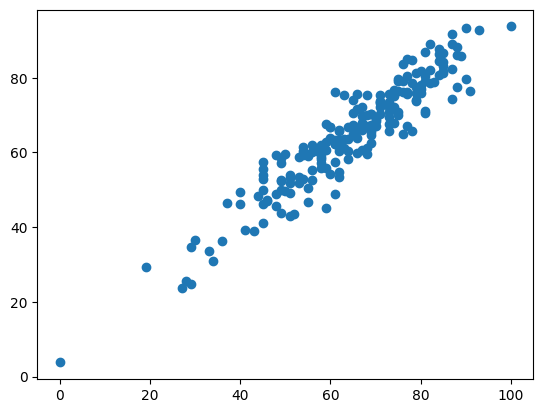

In [ ]:
plt.scatter(Y_test,Y_predict_lin_model)
x_label="Y_test"
y_label="Y_predicted"
plt.show()

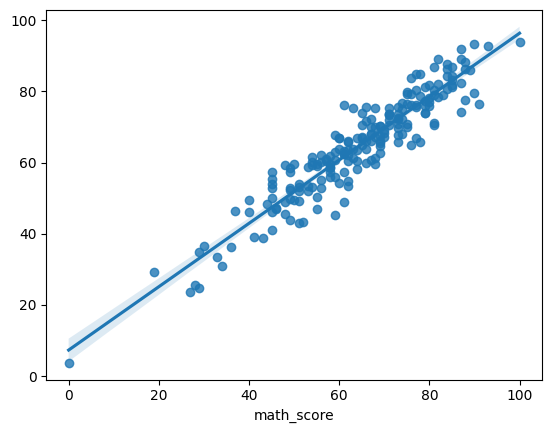

In [ ]:
sns.regplot(x=Y_test,y=Y_predict_lin_model);